<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/DL_classification_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
**Purpose:**  
* Deep Learning algorithm으로 diabetes dataset에 대한 classification

**New library**  
1. `import seaborn as sns`  
    **Seaborn** is a **Python data visualization library based on Matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating complex visualizations with less code and more visually appealing designs compared to Matplotlib alone.
2. `from sklearn.metrics import mean_squared_error`
3. `import tensorflow as tf`
4. `from tensorflow import keras`
    

## 0. 1. Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for hitmap drawing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 유전병 유무(0, 1)
'''

Text(0.5, 1.0, 'label')

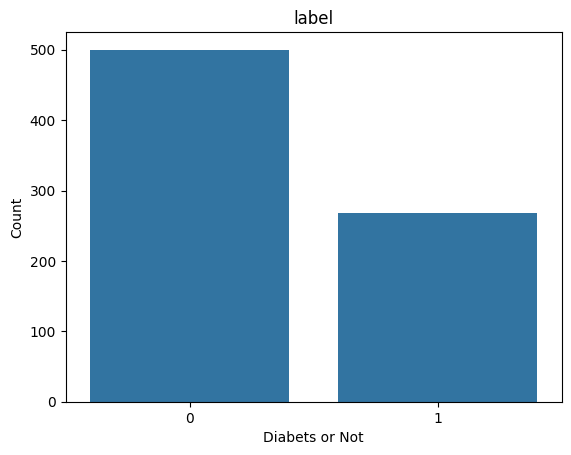

In [11]:
# label count 확인 by graph
sns.countplot(data=diabetes, x='Outcome')
plt.xlabel('Diabets or Not')
plt.ylabel('Count')
plt.title('label')

In [12]:
# label count 확인 by numeric
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
# missing value 확인
# .info()는 non-missing value의 수를 제공한다
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# if missing value is exist, drop it(제거말고 median 대체 등도 가능함)
# diabetes = diabetes.dropna()

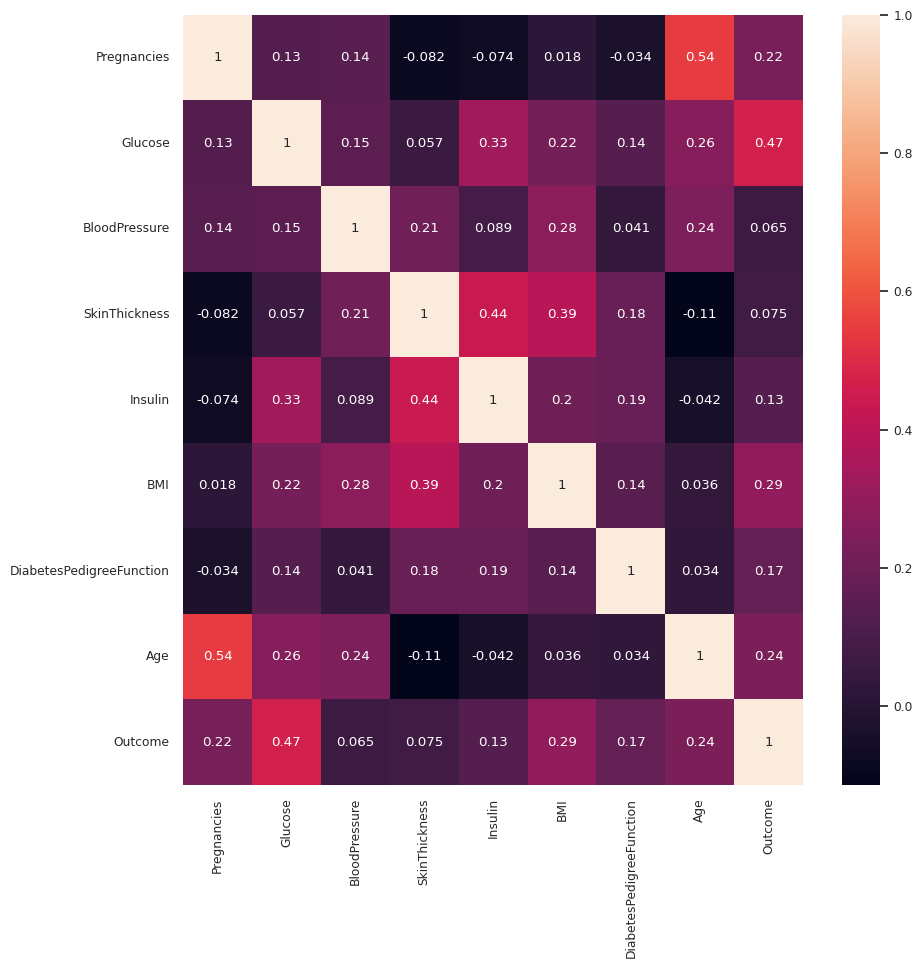

In [20]:
# correlation SOLUTION 1.
# numerical하게 파악 가능함, missing value는 파악 불가

# if corr >= 0.3, correlated and if corr >= 0.7, high correlated
diabetes_corr = diabetes.corr()

# hitmap ploting by Seaborn library
# The 'annot' parameter is used to add annotations to the cells of a heatmap.
# The 'cbar' parameter controls the display of the color bar(position=right) in plots like heatmaps.
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(diabetes_corr, annot=True, cbar=True)
plt.show()

# the label(BMI) is correlated with SkinThickness

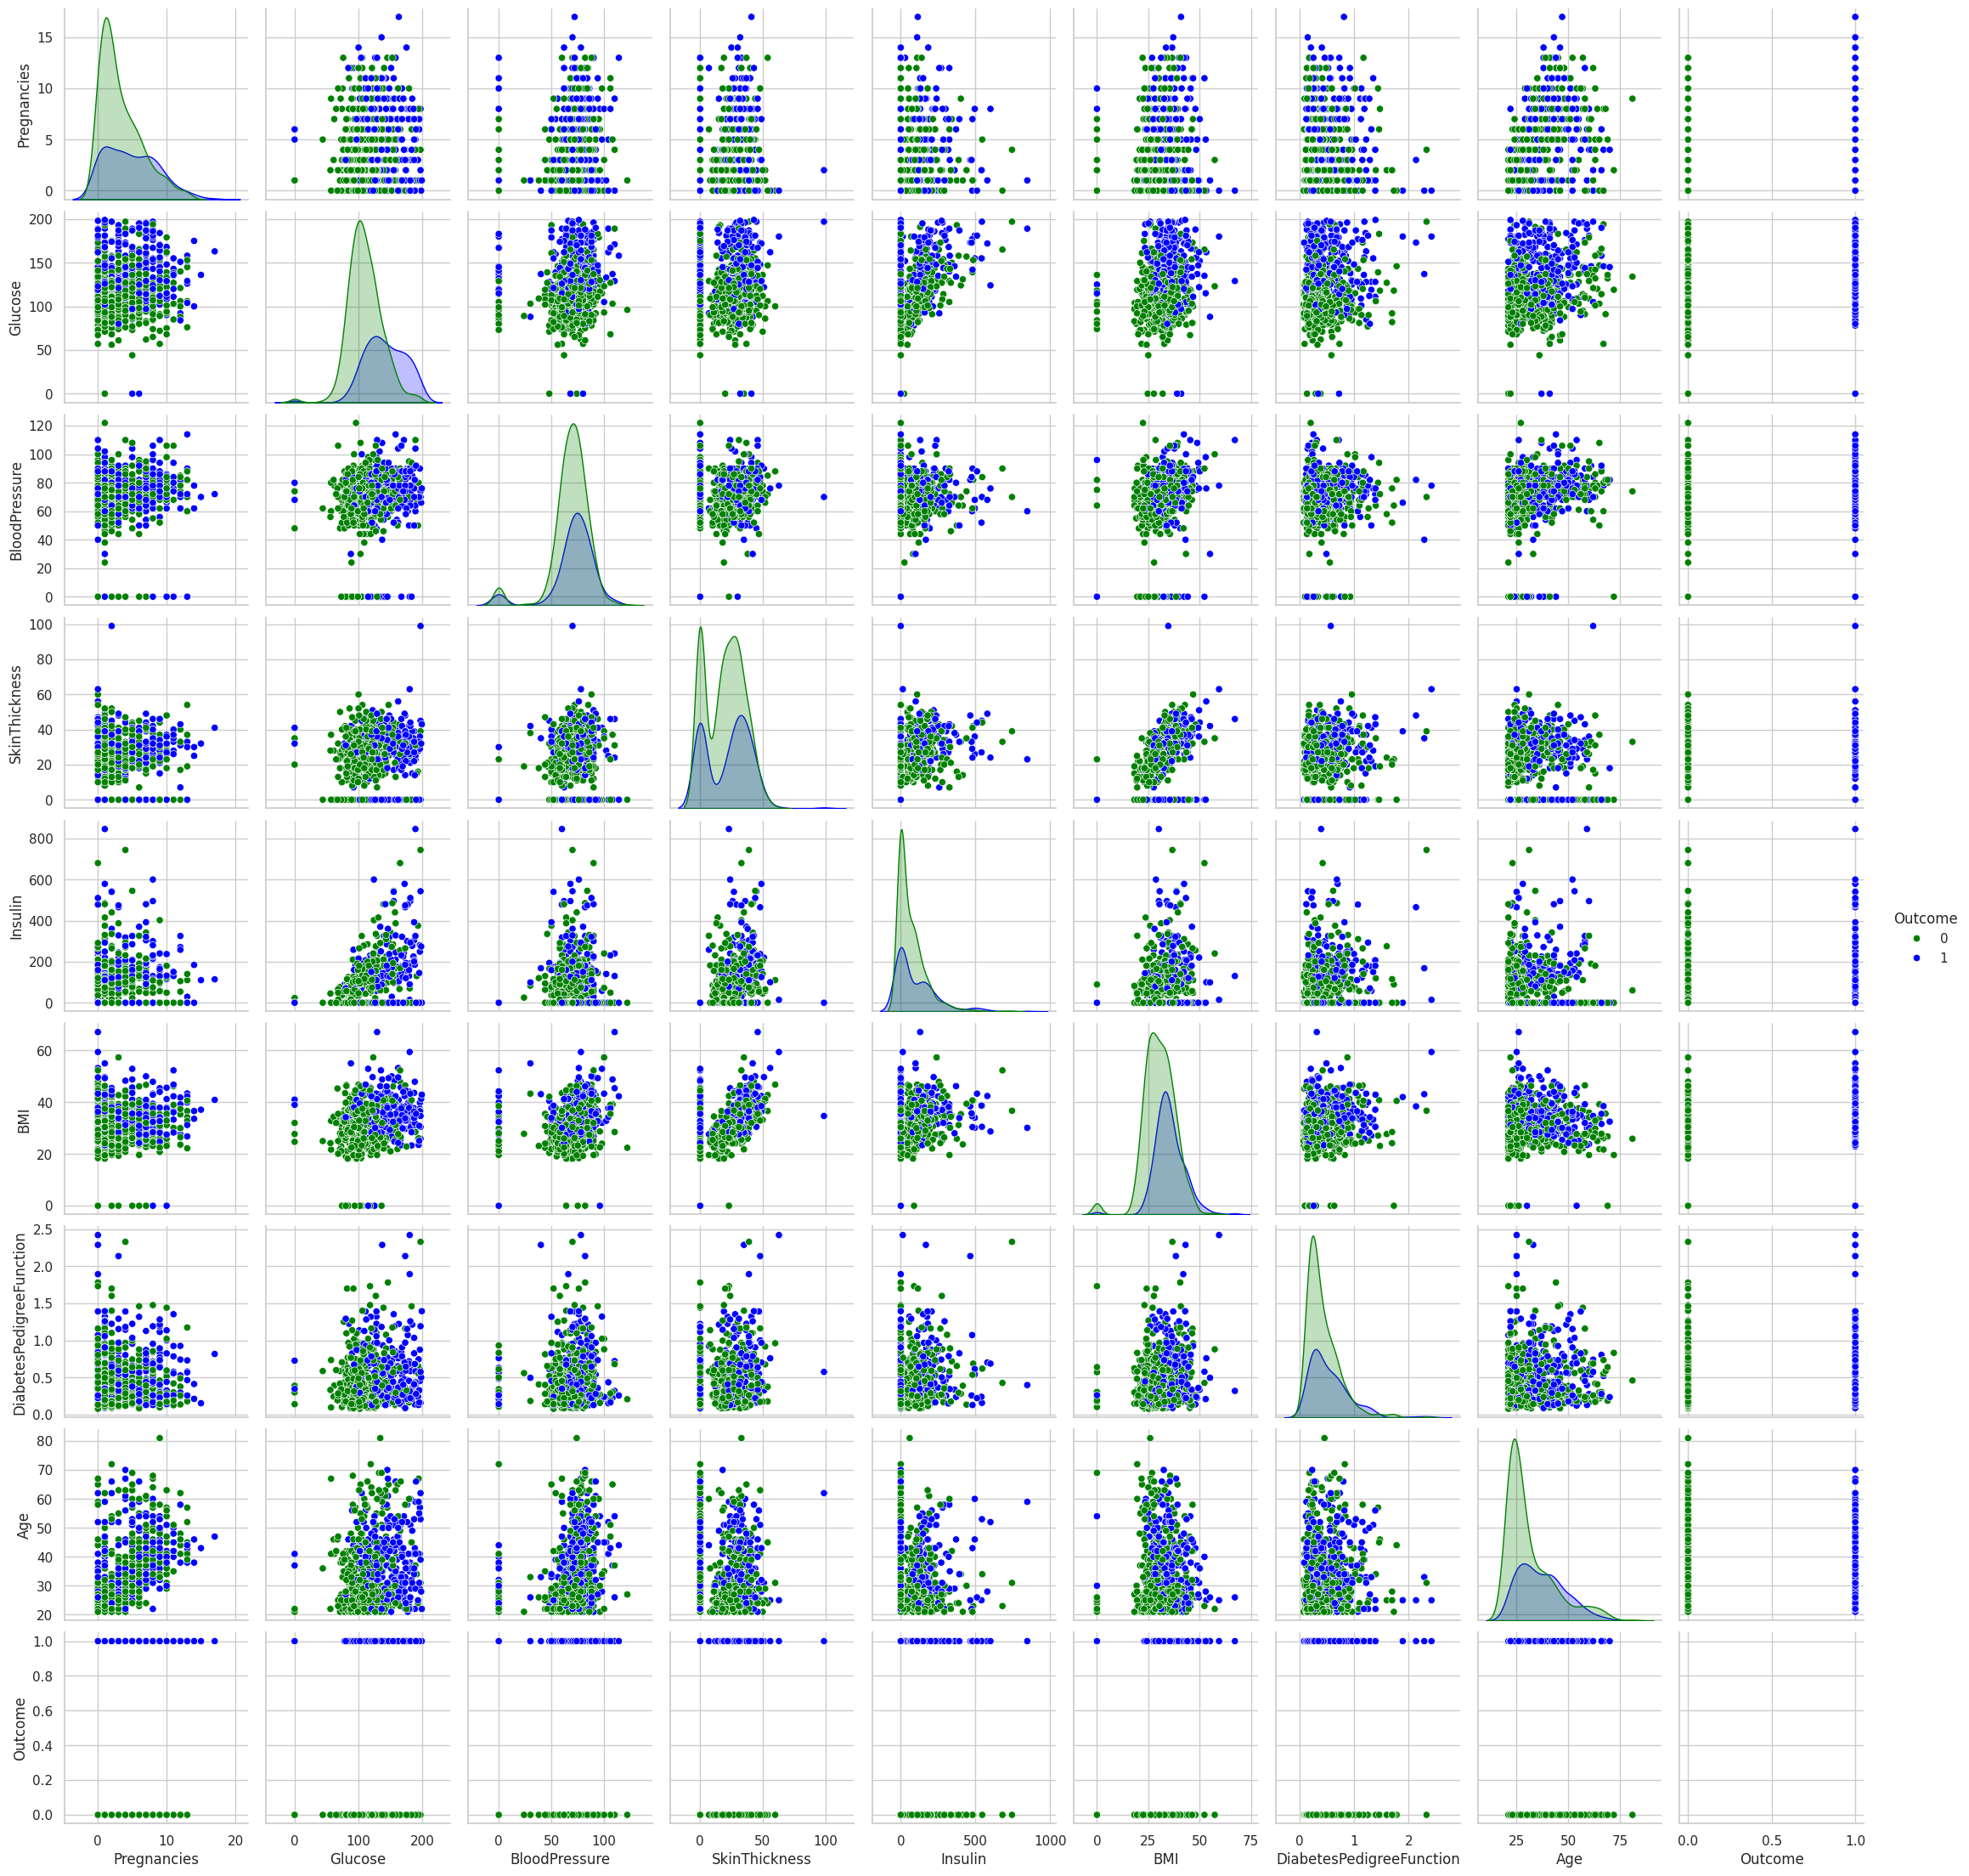

In [36]:
# correlation SOLUTION 2.
# scatter plot 또는 others로 확인 가능, missing value도 확인 가능
sns.pairplot(diabetes,
             vars=['Pregnancies', 'Glucose', 'BloodPressure',
                   'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                   'Age', 'Outcome'],
             hue='Outcome', # 'Outcome'의 value에 따라 구분하여 plotting
             palette = {0: 'green', 1: 'blue'}) # hue에서의 색상 구분 지정
plt.show()

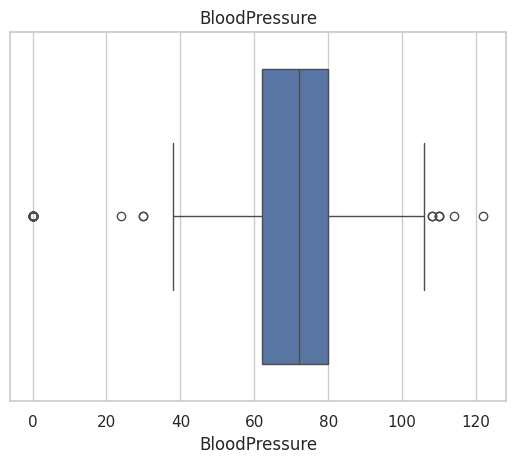

In [33]:
# 특정 column의 range 확인 및 outliar 확인
sns.set_theme(style='whitegrid')
sns.boxplot(x='BloodPressure', data=diabetes)
plt.title('BloodPressure')
plt.show()

<ipython-input-38-21ec76e5d4b5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  diabetes.hist(ax=ax)


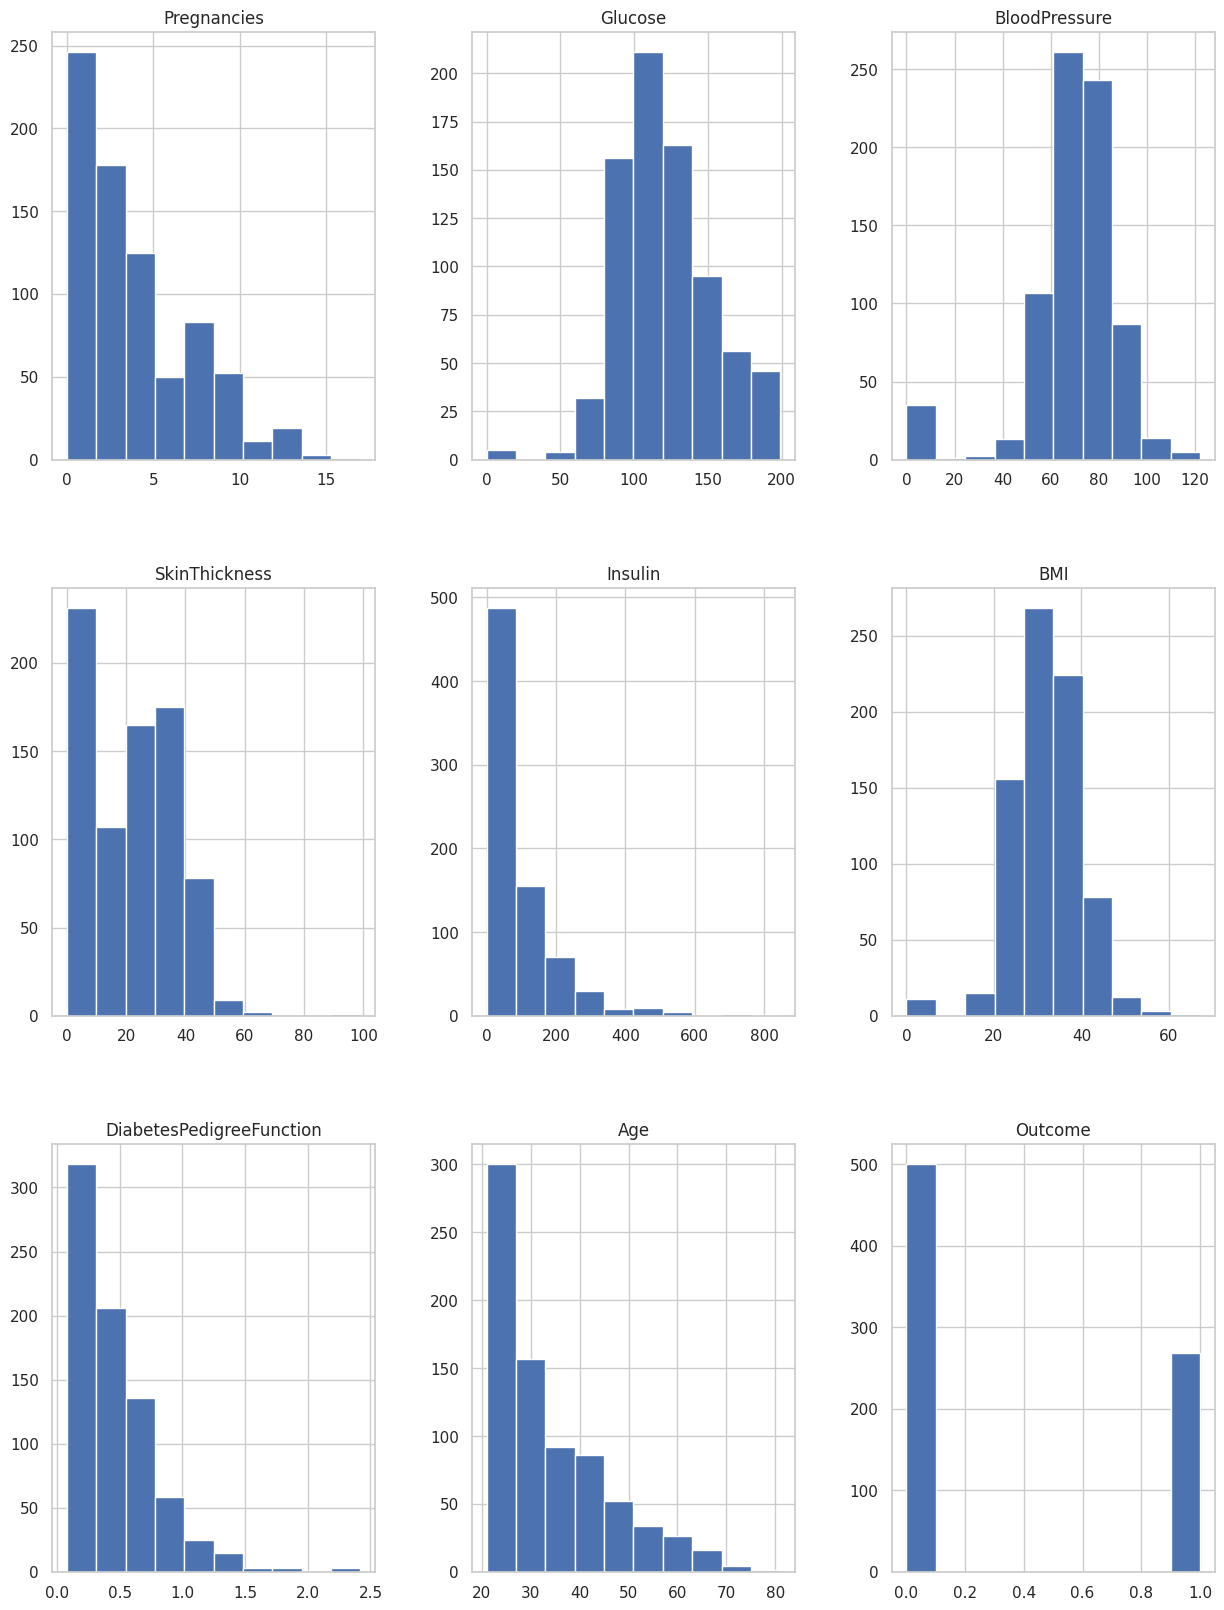

In [38]:
# 각 column별 histogram 확인
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
diabetes.hist(ax=ax)
plt.show()